In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

In [3]:
data = pd.read_csv("C:/Users/iannr/OneDrive/Desktop/Data_Projects/Clustering and Classifying Wine Data/winequality-red.csv")
data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#Preprocessing

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
y = data['quality']
X = data.drop('quality', axis=1)


In [9]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [10]:
#Clustering

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(n_clusters=6)

In [11]:
clusters = kmeans.predict(X)
clusters

array([0, 0, 0, ..., 3, 3, 2])

In [12]:
#Visualization

pca = PCA(n_components=2)

reduced_X = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
reduced_X

,PC1,PC2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


In [13]:
reduced_X['cluster'] = clusters
reduced_X

,PC1,PC2,cluster
0,-1.619530,0.450950,0
1,-0.799170,1.856553,0
2,-0.748479,0.882039,0
3,2.357673,-0.269976,1
4,-1.619530,0.450950,0
...,...,...,...
1594,-2.150500,0.814286,3
1595,-2.214496,0.893101,3
1596,-1.456129,0.311746,3
1597,-2.270518,0.979791,3


NameError: name 'reduced_centers' is not defined

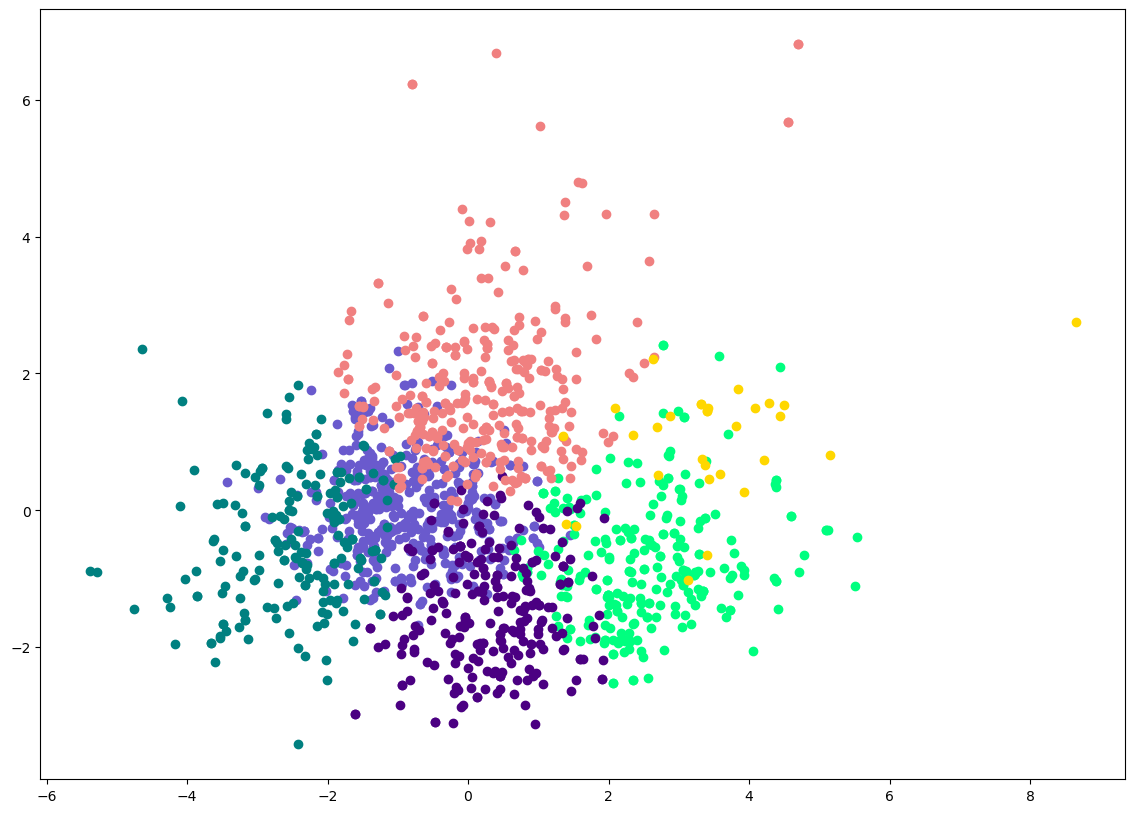

In [14]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC2'], color='slateblue')
plt.scatter(reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC2'], color='springgreen')
plt.scatter(reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC2'], color='indigo')
plt.scatter(reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC2'], color='teal')
plt.scatter(reduced_X[reduced_X['cluster'] == 4].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 4].loc[:, 'PC2'], color='lightcoral')
plt.scatter(reduced_X[reduced_X['cluster'] == 5].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 5].loc[:, 'PC2'], color='gold')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.show()

In [15]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

C:\Users\iannr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-0.91024209,  0.04308162],
       [ 2.52422957, -0.74253649],
       [ 0.32545048, -1.46180476],
       [-2.44161651, -0.45030096],
       [ 0.225186  ,  1.76906505],
       [ 3.45573535,  1.01303151]])

In [16]:
#Training the data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [17]:
model = MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

In [19]:
print("Model Accuracy: {}".format(model.score(X_test, y_test)))

Model Accuracy: 0.65
